# Radar Chart

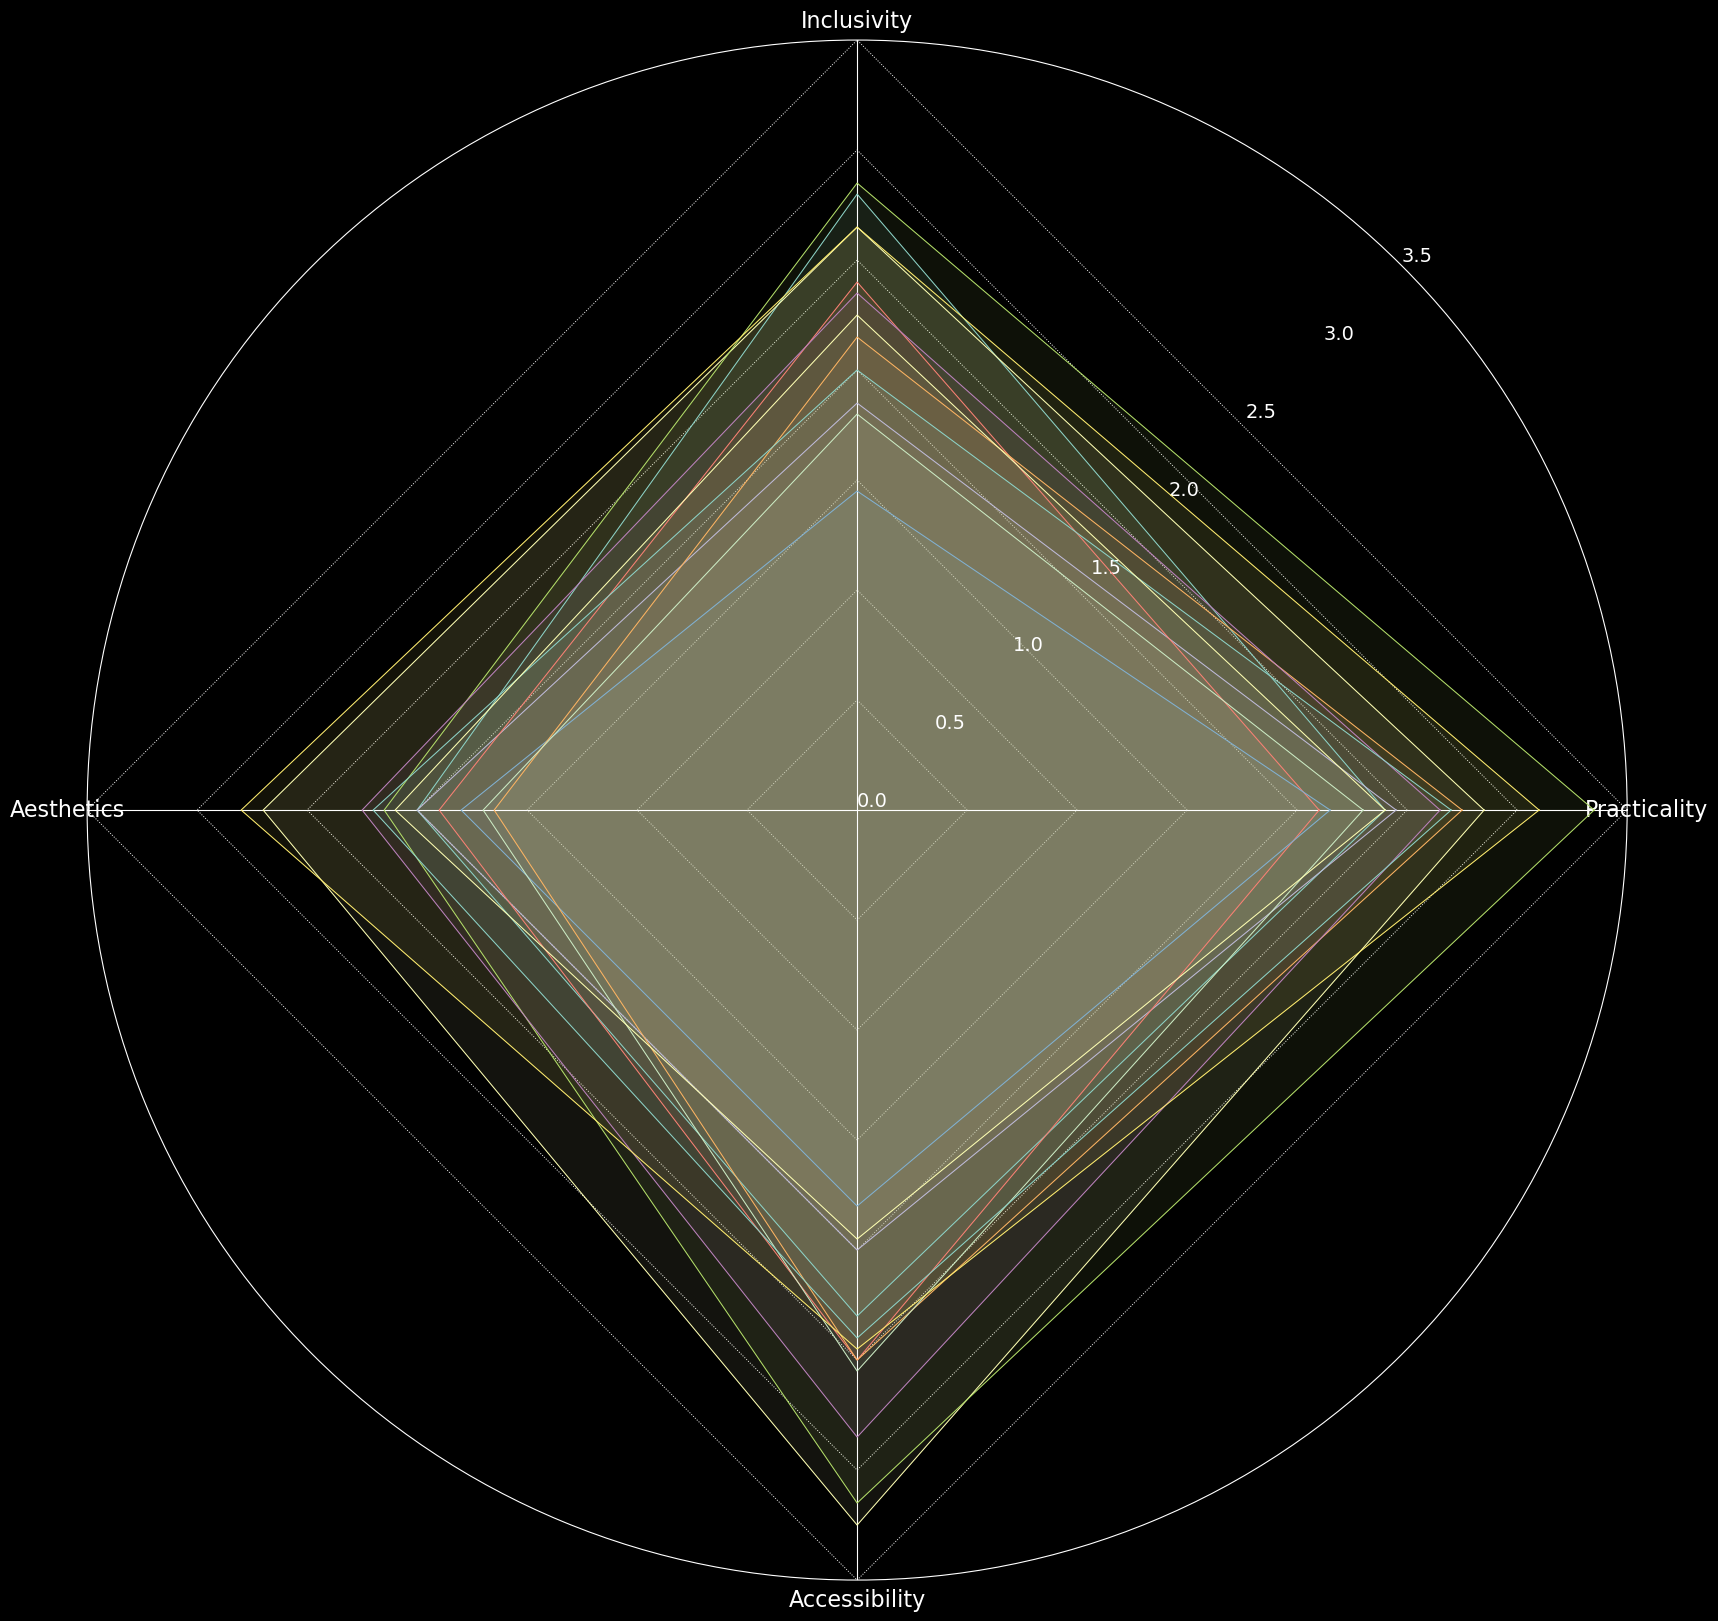

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned data
data = pd.read_csv('data/ratings_individual_analysis.csv')

# Prepare data for radar chart
evaluator_means = data.groupby('Evaluator').mean().reset_index()

# Plot the radar chart
def plot_radar_chart(df, features):
    # Number of variables
    num_vars = len(features)
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the plot
    
    # Setup the radar chart
    fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor('black') 
    ax.set_facecolor('black')         

    ax.set_thetagrids(np.degrees(angles[:-1]), features, fontsize=16, color='white')
    
    r_range = np.arange(0, 4, 0.5)
    ax.set_rgrids(r_range, angle=45, color='white', size=14)
    ax.set_ylim(0, 3.5)
    
    for r_value in r_range:
        ax.plot(angles, [r_value] * len(angles), 'grey', ls=':', lw=0.1)
    
    for _, row in df.iterrows():
        values = row[features].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=0.75, linestyle='solid', label=row['Evaluator'])
        ax.fill(angles, values, alpha=0.08)
    
    ax.yaxis.grid(False) 
    
    for r_value in r_range:
        ax.plot(angles, [r_value] * (len(angles)), ls=':', color='white', linewidth=0.7, zorder=0)
    
    plt.show()


features = ['Practicality', 'Inclusivity', 'Aesthetics', 'Accessibility']
plot_radar_chart(evaluator_means, features)


# Dendrogram

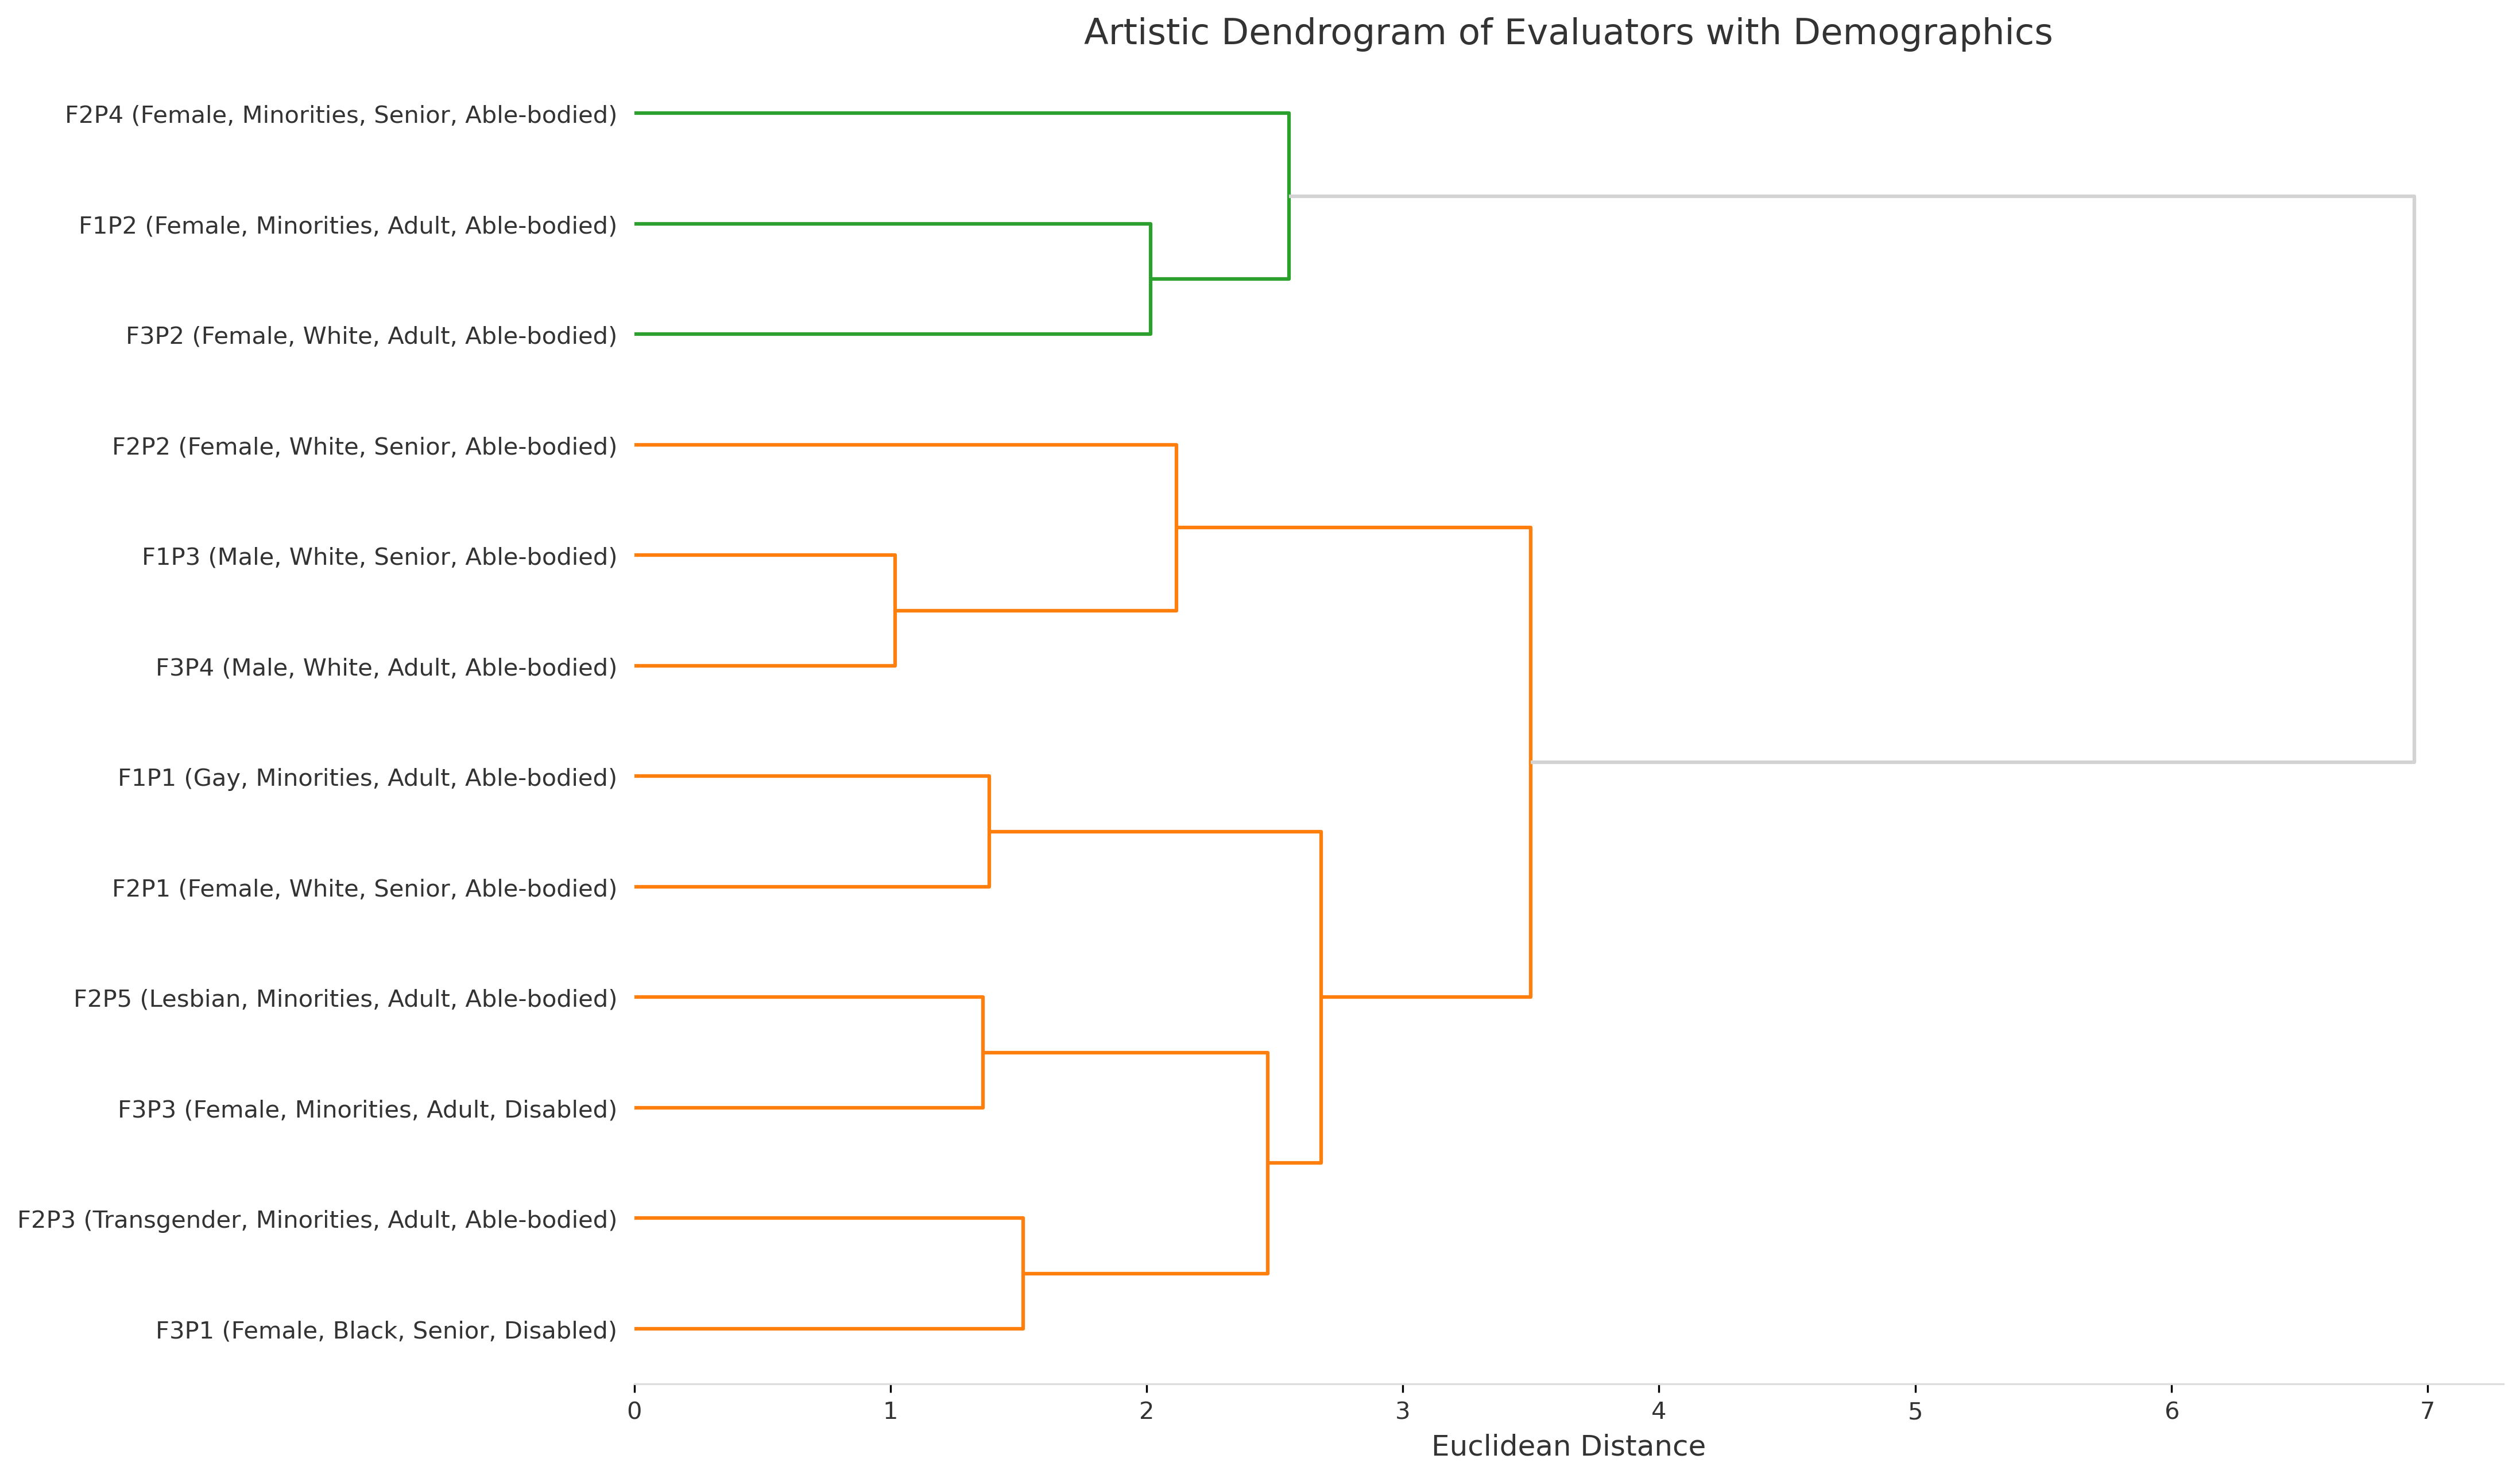

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('data/demographic_analysis.csv')


plt.style.use('default')

numeric_data = data.select_dtypes(include=[np.number])
evaluator_means = numeric_data.groupby(data['evaluator']).mean().reset_index()

# Add demographic information
demographics = data[['evaluator', 'Demographic']].drop_duplicates().set_index('evaluator')
evaluator_means = evaluator_means.join(demographics, on='evaluator')

# Standardizing the numeric data (exclude non-numeric columns)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(evaluator_means.select_dtypes(include=[np.number]))

# Hierarchical clustering
linked = linkage(data_scaled, method='ward')

# Plotting the dendrogram 
plt.figure(figsize=(14, 10), dpi=300)
dendrogram(linked,
           orientation='right',
           labels=evaluator_means.apply(lambda x: f"{x['evaluator']} ({x['Demographic']})", axis=1).values,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10,
           color_threshold=0.7 * max(linked[:, 2]), 
           above_threshold_color='#D3D3D3',  
           leaf_rotation=0) 


plt.title('Artistic Dendrogram of Evaluators with Demographics', fontsize=15, color='#333333')
plt.xlabel('Euclidean Distance', fontsize=12, color='#333333')
plt.xticks(color='#333333')
plt.yticks(color='#333333')
plt.grid(False)  
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color('#DDDDDD')


plt.gca().set_facecolor('white')  
plt.show()
